In [2]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-w-stats-ServeBasics.csv" # Make sure the url is the raw version of the file on GitHub
url_male = 'https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-stats-ServeBasics.csv'

url_points = 'https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-w-points.csv' # Make sure the url is the raw version of the file on GitHub

url_male_points = 'https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points.csv' # Make sure the url is the raw version of the file on GitHub


df_points = pd.read_csv(url_points,error_bad_lines=False,encoding='latin-1')
df = pd.read_csv(url,error_bad_lines=False)
df_male = pd.read_csv(url_male, usecols=range(11),skip_blank_lines=True)
df_male_points = pd.read_csv(url_male_points,error_bad_lines=False,encoding='latin-1')

In [3]:
def percent(df):
    df["t_%"] = df["t"]/df["pts"]
    df["body_%"] = df["body"]/df["pts"]
    df["wide_%"] = df["wide"]/df["pts"]
    df["aces_%"] = df["aces"]/df["pts"]
    df = df[(df["row"] == "1 Total") | (df["row"] == "2 Total")]
    df = df.drop(["unret","forced_err","pts_won_lte_3_shots"],axis=1)

    return df

In [4]:
def gender(df):
    total_aces = df["aces"].sum()
    total_serves = df["pts"].sum()

    return (100*(total_aces/total_serves))

In [5]:
def type_diff(df):
    total_fir_sev = df["1stIn"].count()
    df_fir = df[(df["1stIn"] == 1.0)]
    aces_fir = df_fir["isAce"].sum()

    total_sec_sev = df["2ndIn"].count()
    df_sec = df[(df["2ndIn"] == 1.0)]
    aces_sec = df_sec["isAce"].sum()

    return (total_fir_sev,aces_fir,total_sec_sev,aces_sec)


In [6]:
def accuracy(df):
    acc = 100*(df["1stIn"].sum()+df["2ndIn"].sum())/(df["1stIn"].count()+df["2ndIn"].count())
    acc1 = 100*(df["1stIn"].sum()/df["1stIn"].count())
    acc2 = 100*(df["2ndIn"].sum()/df["2ndIn"].count())

    return (acc, acc1, acc2)


In [7]:
def accuracy_2(df,df_2):
    acc = 100*(df["1stIn"].sum()+df["2ndIn"].sum()+df_2["1stIn"].sum()+df_2["2ndIn"].sum())/(df["1stIn"].count()+df["2ndIn"].count()+df_2["1stIn"].count()+df_2["2ndIn"].count())
    acc1 = 100*(df["1stIn"].sum()+df_2["1stIn"].sum())/(df["1stIn"].count()+df_2["1stIn"].count())
    acc2 = 100*(df["2ndIn"].sum()+df_2["2ndIn"].sum())/(df["2ndIn"].count()+df_2["2ndIn"].count())

    return (acc,acc1,acc2)

In [8]:
def serve_dir(df,num):
    dir_tot = df["1st"].str.count(num).sum()+df["2nd"].str.count(num).sum()

    fir_ace = df[(df["isAce"] == True) & (df["1stIn"] == 1.0)]
    fir_ace_tot = fir_ace["1st"].str.count(num).sum()

    sec_ace = df[(df["isAce"] == True) & (df["2ndIn"] == 1.0)]
    sec_ace_tot = sec_ace["2nd"].str.count(num).sum()

    ace_per = (fir_ace_tot + sec_ace_tot)/dir_tot

    return (100*ace_per) 

In [9]:
def serve_dir_2(df,df_2,num):
    dir_tot = df["1st"].str.count(num).sum()+df["2nd"].str.count(num).sum()

    fir_ace = df[(df["isAce"] == True) & (df["1stIn"] == 1.0)]
    fir_ace_tot = fir_ace["1st"].str.count(num).sum()

    sec_ace = df[(df["isAce"] == True) & (df["2ndIn"] == 1.0)]
    sec_ace_tot = sec_ace["2nd"].str.count(num).sum()

    dir_tot_2 = df_2["1st"].str.count(num).sum()+df_2["2nd"].str.count(num).sum()

    fir_ace_2 = df_2[(df_2["isAce"] == True) & (df_2["1stIn"] == 1.0)]
    fir_ace_tot_2 = fir_ace_2["1st"].str.count(num).sum()

    sec_ace_2 = df_2[(df_2["isAce"] == True) & (df_2["2ndIn"] == 1.0)]
    sec_ace_tot_2 = sec_ace_2["2nd"].str.count(num).sum()

    ace_per = (fir_ace_tot + sec_ace_tot+ fir_ace_tot_2 + sec_ace_tot_2)/(dir_tot + dir_tot_2)

    return (100*ace_per,fir_ace_tot + sec_ace_tot+ fir_ace_tot_2 + sec_ace_tot_2, dir_tot + dir_tot_2)  

In [10]:
def ace_per(df,df2):
    ace_per = (df["isAce"].sum()+df2["isAce"].sum())/(df["1stIn"].count()+df["2ndIn"].count()+df2["1stIn"].count()+df2["2ndIn"].count())
    return 100*ace_per


In [205]:
def gender_diff(df):
    total_fir_sev = df["1stIn"].count()
    df_fir = df[(df["1stIn"] == 1.0)]
    aces_fir = df_fir["isAce"].sum()

    total_sec_sev = df["2ndIn"].count()
    df_sec = df[(df["2ndIn"] == 1.0)]
    aces_sec = df_sec["isAce"].sum()

    total_aces = aces_sec + aces_fir
    total_serve = total_fir_sev + total_sec_sev

    return (total_aces,total_serve)

In [190]:
overall_ace = type_diff(df_combine)

In [202]:
print("Overall ace percentage of dataset is: " + str(100*(overall_ace[1]+overall_ace[3])/(overall_ace[0] + overall_ace[2])))

Overall ace percentage of dataset is: 5.0331707007009365


In [204]:
print("first serve ace percentage is: " + str(100*(overall_ace[1])/(overall_ace[0])))
print("second serve ace percentage is: " + str(100*(overall_ace[3])/(overall_ace[2])))

first serve ace percentage is: 6.6785952534400685
second serve ace percentage is: 0.6869131838799395


In [209]:
#male = 1.0, female = 2.0
100*gender_diff(df_points)[0]/gender_diff(df_points)[1]

3.1385315045391557

In [11]:
serve_fem = percent(df)
serve_male = percent(df_male)

In [210]:
Gender = ["Female", "Male"]
Ratio_per_gender = [(100*gender_diff(df_points)[0]/gender_diff(df_points)[1]), (100*gender_diff(df_male_points)[0]/gender_diff(df_male_points)[1])]

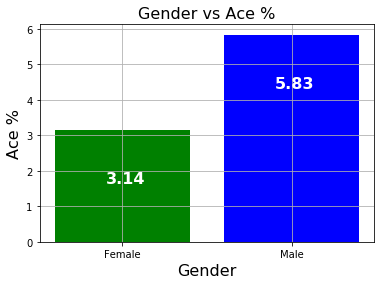

In [283]:
for index, value in enumerate(Ratio_per_gender):
    plt.text(index - 0.1, value -1.5, '{:.2f}'.format(value), fontsize = 16, color = 'white', weight = 'bold')

New_Colors = ['green','blue']
plt.bar(Gender, Ratio_per_gender, color=New_Colors)
plt.title('Gender vs Ace %', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Ace %', fontsize=16)
plt.grid(True)
plt.savefig("Gender_Bar_Chart.jpg", quality = 95)
plt.show()

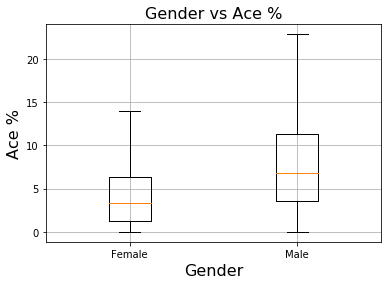

In [286]:
female = 100*serve_fem["aces_%"]
male = 100*serve_male["aces_%"]

plt.grid(True)
plt.title('Gender vs Ace %', fontsize=16)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Ace %', fontsize=16)
plt.savefig("Gender_Box_Plot.jpg", quality = 95)
plt.boxplot ([female,male], labels = ["Female", "Male"], widths =0.25, showfliers=False)
plt.show()

In [240]:
print(100*serve_fem["aces_%"].describe(),100*serve_male["aces_%"].describe())

count    293200.000000
mean          4.462087
std           4.586291
min           0.000000
25%           1.298701
50%           3.333333
75%           6.382979
max          40.625000
Name: aces_%, dtype: float64 count    574600.000000
mean          8.120736
std           6.188660
min           0.000000
25%           3.614458
50%           6.796117
75%          11.302529
max          62.500000
Name: aces_%, dtype: float64


In [16]:
fem_list = type_diff(df_points)
male_list = type_diff(df_male_points)

In [17]:
print("first serve male ace percentage is: " + str(100*(male_list[1])/(male_list[0])))
print("first serve female ace percentage is: " + str(100*(fem_list[1])/(fem_list[0])))
print("second serve male ace percentage is: " + str(100*(male_list[3])/(male_list[2])))
print("second serve female ace percentage is: " + str(100*(fem_list[3])/(fem_list[2])))

first serve male ace percentage is: 7.75831190208839
first serve female ace percentage is: 4.1309364405572495
second serve male ace percentage is: 0.7710206240084612
second serve female ace percentage is: 0.48498698660572587


In [18]:
print("first serve ace percentage is: " + str(100*(fem_list[1]+male_list[1])/(fem_list[0]+male_list[0])))
print("second serve ace percentage is: " + str(100*(fem_list[3]+male_list[3])/(fem_list[2]+male_list[2])))

first serve ace percentage is: 6.6785952534400685
second serve ace percentage is: 0.6869131838799395


In [19]:
print("female serve ace percentage is: " + str(100*(fem_list[1]+fem_list[3])/(fem_list[0]+fem_list[2])))
print("male serve ace percentage is: " + str(100*(male_list[1]+male_list[3])/(male_list[0]+male_list[2])))

female serve ace percentage is: 3.1385315045391557
male serve ace percentage is: 5.83232998755171


In [20]:
print(accuracy(df_points), accuracy(df_male_points),accuracy_2(df_male_points,df_points))

(68.84622163243725, 62.041917134364645, 87.03992890243128) (69.27196452674633, 61.011031557256636, 90.98096245372818) (69.14566094838165, 61.31788270411452, 89.82211188471805)


In [21]:
serve_dir(df_male_points,"6")

8.36006346414849

In [22]:
serve_dir_2(df_male_points,df_points,"4")

(5.345529338489839, 22143, 414234.0)

In [244]:
Serve_type = ["T", "Body", "Wide"]
Ratio_per_type = [serve_dir_2(df_male_points,df_points,"6")[0], serve_dir_2(df_male_points,df_points,"5")[0], serve_dir_2(df_male_points,df_points,"4")[0]]

In [246]:
Ratio_per_type

[7.340126647570759, 0.0762970498474059, 5.345529338489839]

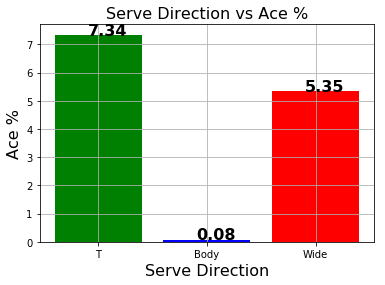

In [290]:
Colors = ['green','blue',"red"]
for index, value in enumerate(Ratio_per_type):
    plt.text(index - 0.1, value, '{:.2f}'.format(value), fontsize = 16, weight = 'bold')
plt.bar(Serve_type, Ratio_per_type, color=Colors)
plt.title('Serve Direction vs Ace %', fontsize=16)
plt.xlabel('Serve Direction', fontsize=16)
plt.ylabel('Ace %', fontsize=16)
plt.grid(True)
plt.savefig("Serve_direction_bar.jpg", quality = 95)
plt.show()

In [25]:
ace_per(df_points,df_male_points)

5.032965658508379

In [26]:
df_new.plot.scatter(y="aces",x="wide_%")

NameError: name 'df_new' is not defined

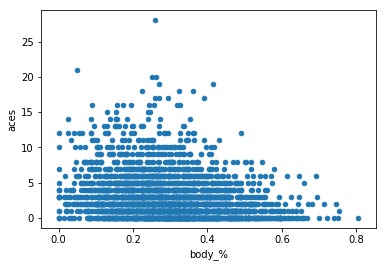

In [58]:
df_new.plot.scatter(y="aces",x="body_%")

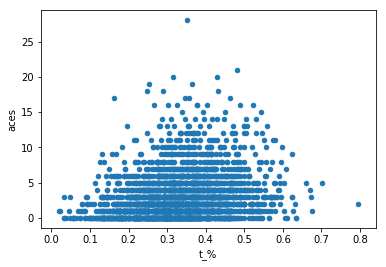

In [59]:
df_new.plot.scatter(y="aces",x="t_%")

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np

In [28]:
df_new = df_points[["1st","1stIn","2nd","2ndIn","isAce"]]

In [29]:
df_new_male = df_male_points[["1st","1stIn","2nd","2ndIn","isAce"]]

In [30]:
#male = 1.0
#female = 2.0

df_new_male["gender"] = 1.0 
df_new["gender"] = 2.0

In [172]:
frames = [df_new,df_new_male]

In [173]:
df_combine = pd.concat(frames)


In [33]:
result = df_combine["isAce"]

In [34]:
df_input = df_combine[["1stIn","2ndIn","gender"]]

In [35]:
df_input_clean = df_input.fillna(-1)

In [36]:
clf = RandomForestClassifier()

In [37]:
clf.fit(df_input_clean, result)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
print(clf.feature_importances_)

[0.36888784 0.5088072  0.12230496]


In [39]:
df_input.iloc[[0]]

,1stIn,2ndIn,gender
0,0,1.0,2.0


In [40]:
print(clf.predict(df_input.iloc[[0]]))

[False]


In [41]:
#
print(clf.predict_proba(df_input.iloc[[0]]))

[[0.99441025 0.00558975]]


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(df_input_clean, result, test_size=0.2)

In [43]:
X_train.shape, Y_train.shape

((566035, 3), (566035,))

In [44]:
X_test.shape, Y_test.shape

((141509, 3), (141509,))

In [56]:
clf = RandomForestClassifier(n_estimators = 200, max_depth = 2, random_state=0)

In [ ]:
df_input_xg = df_test_10[["1stIn","2ndIn","gender","1st_type","2nd_type"]]
result_xg = df_test_10["isAce"]

In [139]:
df_input_xg_clean = df_input_xg.fillna(-1)

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(df_input_xg_clean, result, test_size=0.2)

In [141]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [142]:
print(clf.feature_importances_)

[0.38008285 0.30308545 0.0558602  0.09019588 0.17077562]


In [144]:
print(clf.predict(df_input_xg_clean.iloc[[0]]))

[False]


In [145]:
print(clf.predict_proba(df_input_xg_clean.iloc[[0]]))

[[0.98987011 0.01012989]]


In [146]:
predict = clf.predict(X_test)

In [147]:
print(clf.score(X_test, Y_test))

0.9298843183119095


In [148]:
Y_test.sum()/Y_test.count()

0.07011568168809051

In [149]:
print(np.count_nonzero(predict==0))
print(np.count_nonzero(predict))

141509
0


In [154]:
print(confusion_matrix(Y_test,predict))
print(classification_report(Y_test,predict))

[[131587      0]
 [  9922      0]]
              precision    recall  f1-score   support

       False       0.93      1.00      0.96    131587
        True       0.00      0.00      0.00      9922

   micro avg       0.93      0.93      0.93    141509
   macro avg       0.46      0.50      0.48    141509
weighted avg       0.86      0.93      0.90    141509



In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
from sklearn import svm

In [151]:
SVM = svm.LinearSVC()
SVM.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [152]:
y_pred = SVM.predict(X_test)

In [153]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[131587      0]
 [  9922      0]]
              precision    recall  f1-score   support

       False       0.93      1.00      0.96    131587
        True       0.00      0.00      0.00      9922

   micro avg       0.93      0.93      0.93    141509
   macro avg       0.46      0.50      0.48    141509
weighted avg       0.86      0.93      0.90    141509



In [76]:
import sys
!{sys.executable} -m pip install xgboost

In [77]:
from xgboost import XGBClassifier

In [174]:
conditions = [(df_combine["1st"].str.contains("4")),(df_combine["1st"].str.contains("5")),(df_combine["1st"].str.contains("6"))]
values = ["4","5","6"]
conditions_2 = [(df_combine["2nd"].str.contains("4",na=False)),(df_combine["2nd"].str.contains("5",na=False)),(df_combine["2nd"].str.contains("6",na=False))]

In [175]:
df_test_10 = df_combine
df_test_10["1st_type"] = np.select(conditions,values)
df_test_10["2nd_type"] = np.select(conditions_2,values)

In [248]:
df_graph = df_test_10[["1stIn","2ndIn","gender","1st_type","2nd_type","isAce"]]

In [249]:
df_graph.head()

,1stIn,2ndIn,gender,1st_type,2nd_type,isAce
0,0,1.0,2.0,6,6,False
1,1,NaN,2.0,4,0,False
2,0,1.0,2.0,6,6,False
3,1,NaN,2.0,5,0,False
4,1,NaN,2.0,4,0,False


In [176]:
df_input_xg = df_test_10[["1stIn","2ndIn","gender","1st_type","2nd_type"]]
result_xg = df_test_10["isAce"]

In [177]:
df_input_xg['1st_type'] = pd.to_numeric(df_input_xg['1st_type'])
df_input_xg['2nd_type'] = pd.to_numeric(df_input_xg['2nd_type'])

In [178]:
X_train_xg, X_test_xg, Y_train_xg, Y_test_xg = train_test_split(df_input_xg, result_xg, test_size=0.2)

In [275]:
model = XGBClassifier(scale_pos_weight=14)
model.fit(X_train_xg, Y_train_xg)

[20:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=14, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [272]:
y_pred_xg = model.predict(X_test_xg)
predictions = [round(value) for value in y_pred_xg]

In [273]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test_xg, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.99%


In [274]:
print(confusion_matrix(Y_test_xg,predictions))
#print(classification_report(Y_test_xg,predictions))

[[66917 64704]
 [  401  9487]]
